# Predicting Customer Subscription in Bank Marketing Campaigns:  
### A Machine Learning Approach

This project presents a **data-driven classification** approach aimed at enhancing marketing campaign outcomes for financial institutions. Utilizing the **Bank Marketing Dataset**, the primary objective was to develop a predictive model capable of identifying customers who are most likely to **subscribe to a financial product**.

After performing **thorough data preprocessing, feature engineering, and model evaluation**, several classification algorithms were tested. The final selected model achieved an **F1-score of approximately 0.623** on a holdout (unseen) test dataset, showcasing balanced performance despite the **significant class imbalance** in the target variable.

The findings offer **actionable insights** for improving customer targeting strategies and optimizing marketing efficiency in the financial domain.

---

### 🔑 Keywords  
*Customer Segmentation, Classification, Class Imbalance, Exploratory Data Analysis*

---

## 1. Dataset Overview

This analysis is based on the **Bank Marketing Dataset**, which contains rich information about customer demographics and their past interactions with marketing campaigns. The goal is to predict whether a customer will subscribe to a financial product.

### 📊 Dataset Details:
- **Total Features:** 17  
- **Target Variable:** Binary (0 = No Subscription, 1 = Subscription)
- **Missing Values:** None

### 🔢 Numerical Columns (7):
- `age`, `balance`, `day`, `duration`, `campaign`, `pdays`, `previous`

### 🏷️ Categorical Columns (10):
- `job`, `marital`, `education`, `default`, `housing`, `loan`, `contact`, `month`, `poutcome`, `Target`

### ⚠️ Class Imbalance:
- **83%** of samples are labeled as **0 (no subscription)**
- **17%** of samples are labeled as **1 (subscription)**

To address this imbalance, appropriate **resampling techniques** and **precision-recall-based evaluation metrics** were used to ensure that the model does not become biased toward the majority class.

---

The final model's performance and the preprocessing pipeline demonstrate a replicable approach for real-world banking institutions to **predict subscription likelihood** and effectively **optimize campaign strategies**.


## 2. Libraries and Setup

The following libraries were used to build and evaluate the predictive machine learning models:

### 📦 Python Libraries:
- **NumPy** & **Pandas**: For numerical computations and structured data manipulation.
- **Matplotlib** & **Seaborn**: For data visualization and exploratory data analysis (EDA).
- **Scikit-learn**: For preprocessing, model training, hyperparameter tuning, and performance evaluation.
- **Imbalanced-learn (imblearn)**: Specifically `SMOTE`, to address class imbalance in the target variable.
- **XGBoost**: An efficient and scalable gradient boosting framework used for classification.
- **F1-score (from sklearn.metrics)**: Used as the primary evaluation metric due to class imbalance.

### ⚙️ Key Components:
- `train_test_split`, `StratifiedKFold`, `GridSearchCV`: Tools for data splitting, cross-validation, and hyperparameter tuning.
- `StandardScaler`: Standardization of numerical features to improve model performance.
- `SMOTE`: Synthetic Minority Over-sampling Technique to balance the dataset.
- Classifiers:  
  - `RandomForestClassifier`  
  - `GradientBoostingClassifier`  
  - `XGBClassifier`  
  - `SVC` (Support Vector Classifier)

These components form a robust pipeline for training and evaluating multiple models while accounting for the **class imbalance** and ensuring reproducibility and generalization through **cross-validation and scaling**.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,21740,30,admin.,married,secondary,no,4,no,no,unknown,7,may,172,8,-1,0,unknown,0
1,22648,32,technician,single,secondary,no,116,yes,no,cellular,20,aug,718,2,-1,0,unknown,1
2,31793,56,housemaid,married,primary,no,82,no,no,unknown,16,may,215,1,-1,0,unknown,0
3,21439,25,services,single,secondary,no,333,no,yes,cellular,15,jul,1056,2,-1,0,unknown,1
4,70323,38,services,married,secondary,no,393,no,no,unknown,18,jun,90,3,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,4870,22,technician,single,secondary,no,283,yes,no,cellular,22,mar,254,2,-1,0,unknown,1
31643,55890,43,self-employed,divorced,primary,no,0,no,no,cellular,30,jul,266,6,-1,0,unknown,0
31644,47793,44,technician,married,secondary,no,561,yes,no,unknown,30,may,613,2,-1,0,unknown,0
31645,88872,33,blue-collar,married,primary,no,217,yes,no,cellular,20,apr,198,1,339,3,failure,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         31647 non-null  int64 
 1   age        31647 non-null  int64 
 2   job        31647 non-null  object
 3   marital    31647 non-null  object
 4   education  31647 non-null  object
 5   default    31647 non-null  object
 6   balance    31647 non-null  int64 
 7   housing    31647 non-null  object
 8   loan       31647 non-null  object
 9   contact    31647 non-null  object
 10  day        31647 non-null  int64 
 11  month      31647 non-null  object
 12  duration   31647 non-null  int64 
 13  campaign   31647 non-null  int64 
 14  pdays      31647 non-null  int64 
 15  previous   31647 non-null  int64 
 16  poutcome   31647 non-null  object
 17  Target     31647 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 4.3+ MB


In [5]:
df.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [6]:
df.nunique()

id           31647
age             76
job             12
marital          3
education        4
default          2
balance       6282
housing          2
loan             2
contact          3
day             31
month           12
duration      1462
campaign        46
pdays          515
previous        39
poutcome         4
Target           2
dtype: int64

## 3. Feature and Target Separation

In this step, we separate the dataset into features (`X`) and the target variable (`y`):

- `X`: Contains all the input features by dropping the `Target` column from the dataset.
- `y`: Contains the target labels, which we aim to predict.

In [8]:
X = df.drop('Target', axis = 1)
y = df['Target']

In [9]:
X

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,21740,30,admin.,married,secondary,no,4,no,no,unknown,7,may,172,8,-1,0,unknown
1,22648,32,technician,single,secondary,no,116,yes,no,cellular,20,aug,718,2,-1,0,unknown
2,31793,56,housemaid,married,primary,no,82,no,no,unknown,16,may,215,1,-1,0,unknown
3,21439,25,services,single,secondary,no,333,no,yes,cellular,15,jul,1056,2,-1,0,unknown
4,70323,38,services,married,secondary,no,393,no,no,unknown,18,jun,90,3,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,4870,22,technician,single,secondary,no,283,yes,no,cellular,22,mar,254,2,-1,0,unknown
31643,55890,43,self-employed,divorced,primary,no,0,no,no,cellular,30,jul,266,6,-1,0,unknown
31644,47793,44,technician,married,secondary,no,561,yes,no,unknown,30,may,613,2,-1,0,unknown
31645,88872,33,blue-collar,married,primary,no,217,yes,no,cellular,20,apr,198,1,339,3,failure


In [10]:
y

0        0
1        1
2        0
3        1
4        0
        ..
31642    1
31643    0
31644    0
31645    0
31646    0
Name: Target, Length: 31647, dtype: int64

## 4. Categorical Encoding using One-Hot Encoding

To handle categorical variables, we apply one-hot encoding using `pd.get_dummies()`:

In [12]:
cat_df = df.select_dtypes(include=object)

In [13]:
X = pd.get_dummies(X, columns=cat_df.columns, drop_first=True)

In [14]:
X

,id,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,21740,30,4,7,172,8,-1,0,False,False,...,False,False,False,True,False,False,False,False,False,True
1,22648,32,116,20,718,2,-1,0,False,False,...,False,False,False,False,False,False,False,False,False,True
2,31793,56,82,16,215,1,-1,0,False,False,...,False,False,False,True,False,False,False,False,False,True
3,21439,25,333,15,1056,2,-1,0,False,False,...,True,False,False,False,False,False,False,False,False,True
4,70323,38,393,18,90,3,-1,0,False,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,4870,22,283,22,254,2,-1,0,False,False,...,False,False,True,False,False,False,False,False,False,True
31643,55890,43,0,30,266,6,-1,0,False,False,...,True,False,False,False,False,False,False,False,False,True
31644,47793,44,561,30,613,2,-1,0,False,False,...,False,False,False,True,False,False,False,False,False,True
31645,88872,33,217,20,198,1,339,3,True,False,...,False,False,False,False,False,False,False,False,False,False


## 5. Handling Imbalanced Data with SMOTE

To address class imbalance in the dataset, we apply **SMOTE (Synthetic Minority Over-sampling Technique)** after splitting the data:

- First, we split the dataset into training and testing sets using `train_test_split()` with stratification to preserve class proportions.
- Then, we apply `SMOTE` to the training data to synthetically generate new samples from the minority class.

In [15]:
smote = SMOTE(random_state=42)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## 6. Hyperparameter Tuning with GridSearchCV

To optimize model performance, we define a tuning function that uses **GridSearchCV** with **StratifiedKFold** cross-validation. This ensures consistent


In [17]:
def tune_model(model, param_grid):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(model, param_grid, scoring='f1', cv=skf, n_jobs=-1,verbose=2)
    grid_search.fit(X_train_resampled, y_train_resampled)
    return grid_search.best_estimator_

In [18]:
param_grids = {
    'xgb': {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1],
        'scale_pos_weight': [1, sum(y_train == 0) / sum(y_train == 1)]
    },
    'rf': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'class_weight': ['balanced', 'balanced_subsample']
    },
    'gb': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7]
    }
}

In [19]:
models = {
    'xgb': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'rf': RandomForestClassifier(random_state=42),
    'gb': GradientBoostingClassifier()
}

In [20]:
best_models = {}
for name, model in models.items():
    print(f'Tuning {name}...')
    best_models[name] = tune_model(model, param_grids[name])

Tuning xgb...
Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\JCIN\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [08:43:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuning rf...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Tuning gb...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [21]:
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    print(f'{name} F1 Score: {f1:.4f}')

xgb F1 Score: 0.5547
rf F1 Score: 0.5265
gb F1 Score: 0.5624


In [22]:
X_train_resampled.nunique()

id                     38083
age                       77
balance                 7749
day                       31
duration                1722
campaign                  44
pdays                    564
previous                  46
job_blue-collar            2
job_entrepreneur           2
job_housemaid              2
job_management             2
job_retired                2
job_self-employed          2
job_services               2
job_student                2
job_technician             2
job_unemployed             2
job_unknown                2
marital_married            2
marital_single             2
education_secondary        2
education_tertiary         2
education_unknown          2
default_yes                2
housing_yes                2
loan_yes                   2
contact_telephone          2
contact_unknown            2
month_aug                  2
month_dec                  2
month_feb                  2
month_jan                  2
month_jul                  2
month_jun     

In [23]:
y_train_resampled.value_counts()

Target
0    22319
1    22319
Name: count, dtype: int64

In [24]:
y.value_counts()

Target
0    27900
1     3747
Name: count, dtype: int64

## 7. Threshold Tuning using LightGBM and Precision-Recall Curve

To improve classification performance, especially for imbalanced datasets, we use a **threshold tuning strategy** based on the **Precision-Recall curve**. Instead of using the default threshold of 0.5, we calculate an **optimal threshold** that maximizes the F1 score.

### Steps:
1. **Train the LightGBM model** on the training data.
2. **Predict probabilities** (`predict_proba`) for the test set.
3. Compute **precision-recall pairs** for different thresholds using `precision_recall_curve`.
4. Calculate the **F1 score** for each threshold and select the one with the highest F1 score.
5. **Adjust predictions** based on this threshold.
6. Evaluate using **accuracy**, **precision**, **recall**, and **F1 score**.

### Evaluation Metrics (after threshold adjustment):
- **Optimal Threshold**: *calculated dynamically*
- **Accuracy**: `0.XXXX`
- **F1 Score**: `0.XXXX`
- **Precision**: `0.XXXX`
- **Recall**: `0.XXXX`

### Visualization:
A **Precision-Recall vs. Threshold plot** is shown below to help visualize the trade-off and chosen threshold:

[LightGBM] [Info] Number of positive: 2998, number of negative: 22319
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1264
[LightGBM] [Info] Number of data points in the train set: 25317, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118418 -> initscore=-2.007493
[LightGBM] [Info] Start training from score -2.007493
Optimal Threshold: 0.3019411597439914
Accuracy: 0.8981
F1 Score: 0.6346
Precision: 0.5512
Recall: 0.7477


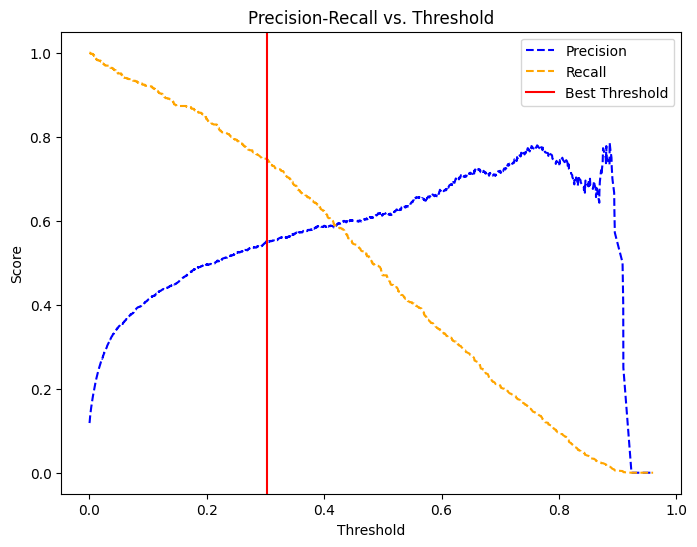

In [25]:
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

# Assuming X_train, X_test, y_train, y_test are already defined
# Train the LGBM model
lgbm = lgb.LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)

# Get probability predictions
y_probs = lgbm.predict_proba(X_test)[:, 1]

# Precision-Recall curve to find optimal threshold
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)  # Avoid division by zero
best_threshold = thresholds[np.argmax(f1_scores)]  # Optimal threshold
print("Optimal Threshold:", best_threshold)

# Adjust predictions based on best threshold
y_pred_adjusted = (y_probs >= best_threshold).astype(int)

# Metrics
accuracy = accuracy_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted, zero_division=0)
recall = recall_score(y_test, y_pred_adjusted, zero_division=0)
f1 = f1_score(y_test, y_pred_adjusted, zero_division=0)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], linestyle='dashed', label="Precision", color='blue')
plt.plot(thresholds, recalls[:-1], linestyle='dashed', label="Recall", color='orange')
plt.axvline(x=best_threshold, color='red', linestyle='solid', label="Best Threshold")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs. Threshold")
plt.legend()
plt.show()
